In [174]:
## 1. PROBLEM STATEMENT

In [175]:
# A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. 
# The product being sold is a term deposit (Fixed Deposit).

In [176]:
## 2. DATA PREPROCESSING

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
plt.style.use('bmh')

In [296]:
plt.style.available

['bmh',
 'seaborn',
 'ggplot',
 'seaborn-notebook',
 'seaborn-muted',
 'seaborn-deep',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-bright',
 'tableau-colorblind10',
 'seaborn-paper',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'grayscale',
 'fast',
 'Solarize_Light2',
 'classic',
 'seaborn-colorblind',
 'seaborn-talk',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-dark-palette',
 'seaborn-dark',
 'dark_background']

In [297]:
df = pd.read_csv('train.csv', sep=',')

In [298]:
df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [300]:
df.drop('duration', axis=1, inplace=True)
# Drop the duration column as all the data in it is non-existent.

In [301]:
df['y'].replace(['no'],0,inplace=True)
df['y'].replace(['yes'],1,inplace=True)

In [302]:
## 3. EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'No. of customers')

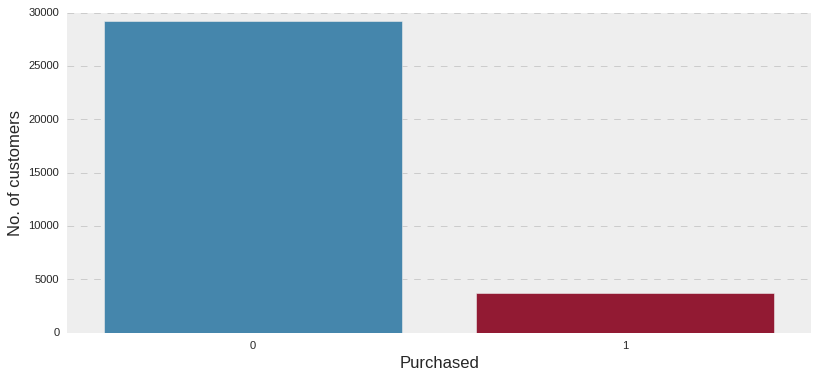

In [303]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='y', data=df)
ax.set_xlabel('Purchased', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [304]:
perc = df['y'].sum()/32978
perc = perc*100
print('Percentage of Customers who purchased the Deposit=' + str(perc) + "%")

Percentage of Customers who purchased the Deposit=11.331796955546123%


In [305]:
# As we can see that most targeted customers are not buying the term deposit indicating that the wrong customers are being targeted in the campaign.
# This will cause a lot of loss to the company in terms of money spent in marketing.
# Only 11% of customers were targeted accurately.

Text(0, 0.5, 'No. of customers')

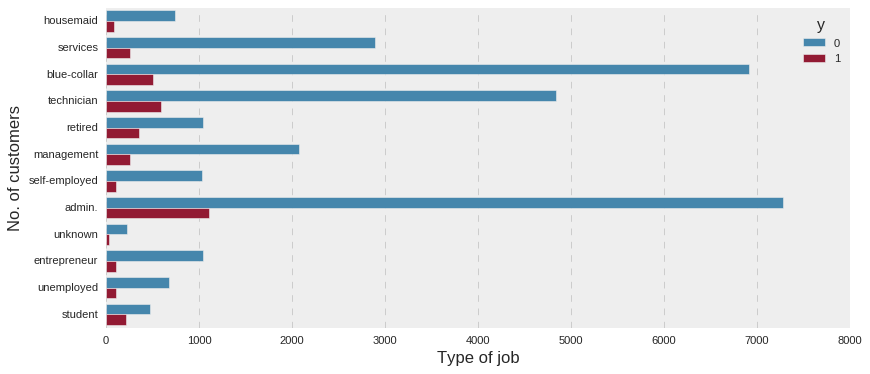

In [306]:
plt.figure(figsize=(12,5))
ax = sns.countplot(y='job', data=df, hue='y')
ax.set_xlabel('Type of job', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [307]:
# Most customers who purchased the term deposit work as Admins.

Text(0, 0.5, 'No. of customers')

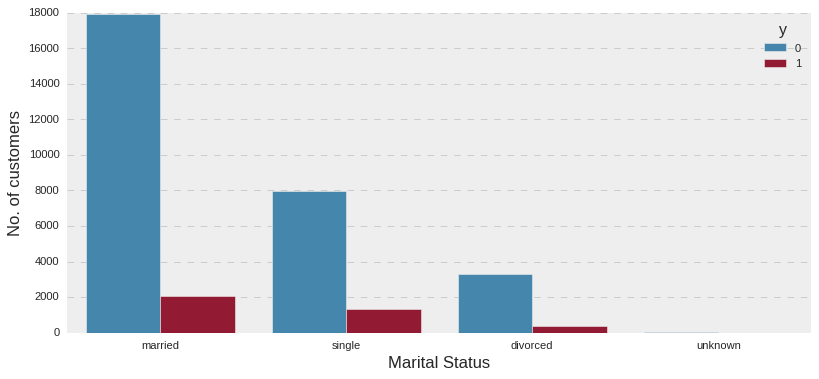

In [308]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='marital', data=df, hue='y')
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [309]:
# Most customers who purchased the term deposit married.

Text(0, 0.5, 'No. of customers')

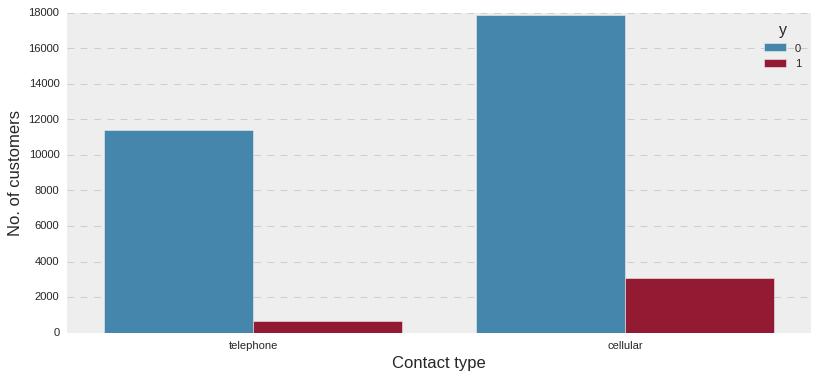

In [310]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='contact',data=df, hue='y')
ax.set_xlabel('Contact type', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [311]:
# Most customers who purchased the term deposit have been contacted on a cellular connection.

Text(0, 0.5, 'No. of customers')

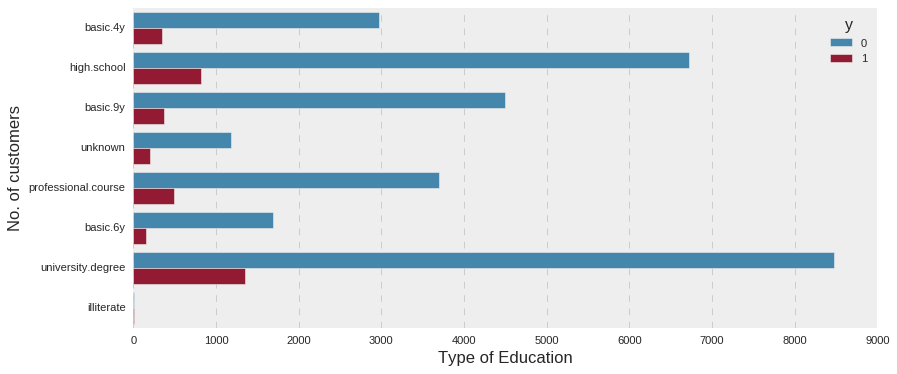

In [312]:
plt.figure(figsize=(12,5))
ax = sns.countplot(y='education', data=df, hue='y')
ax.set_xlabel('Type of Education', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [313]:
# Majority customers who purchased the term deposit have university degrees.

Text(0, 0.5, 'No. of customers')

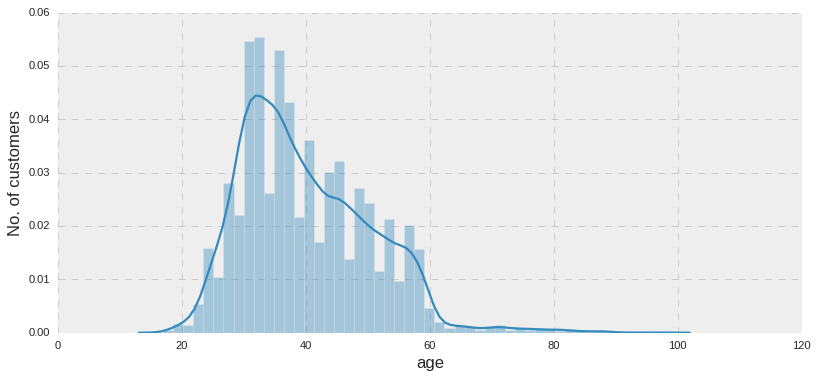

In [314]:
plt.figure(figsize=(12,5))
ax = sns.distplot(a=df['age'])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [315]:
df.groupby('y').median()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,19162,38,2,999,0,1.1,93.918,-41.8,4.857,5195.8
1,35607,37,2,999,0,-1.8,93.200,-40.4,1.266,5099.1


In [316]:
# Most of the customers are around the age of 37-38.

Text(0, 0.5, 'Months')

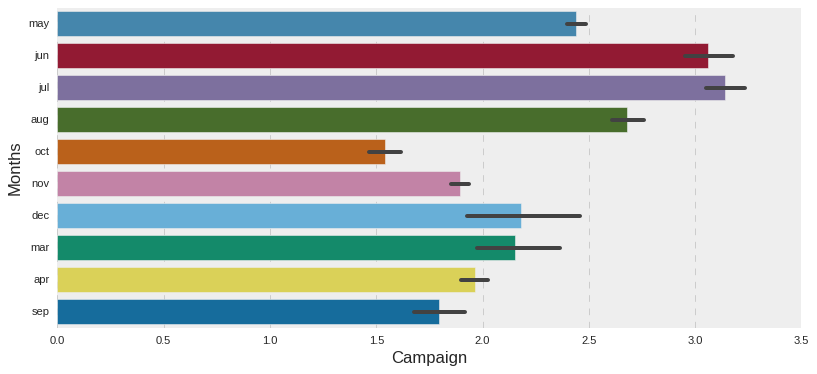

In [317]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='campaign',y='month', data=df)
ax.set_xlabel('Campaign', fontsize=15)
ax.set_ylabel('Months', fontsize=15)

In [318]:
# The campaign went on for most part of the year.

Text(0, 0.5, 'No. of customers')

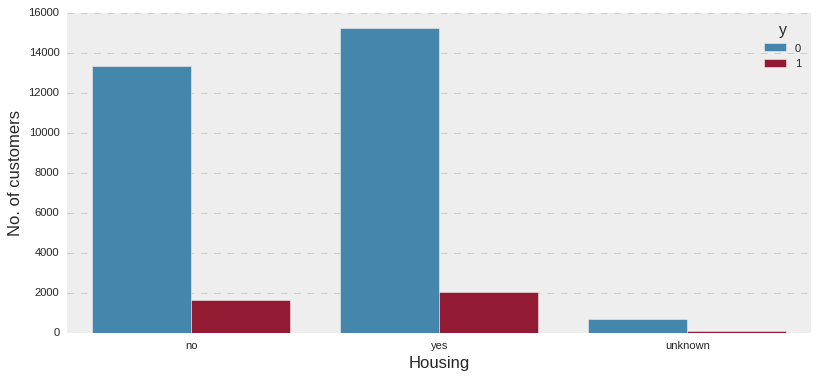

In [319]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='housing', data=df, hue='y')
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

Text(0, 0.5, 'No. of customers')

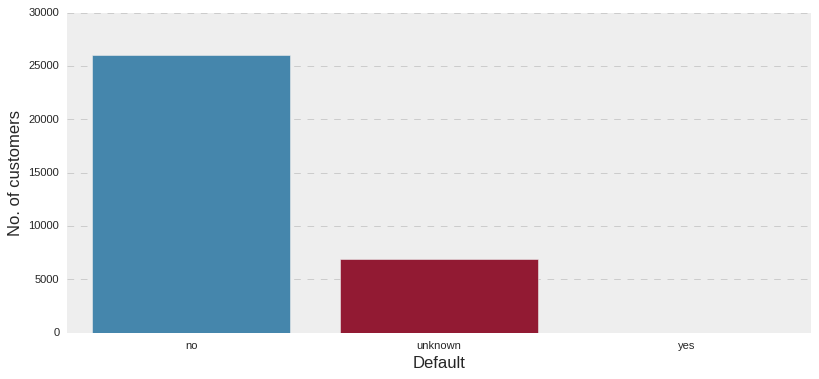

In [320]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='default', data=df)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

Text(0, 0.5, 'No. of customers')

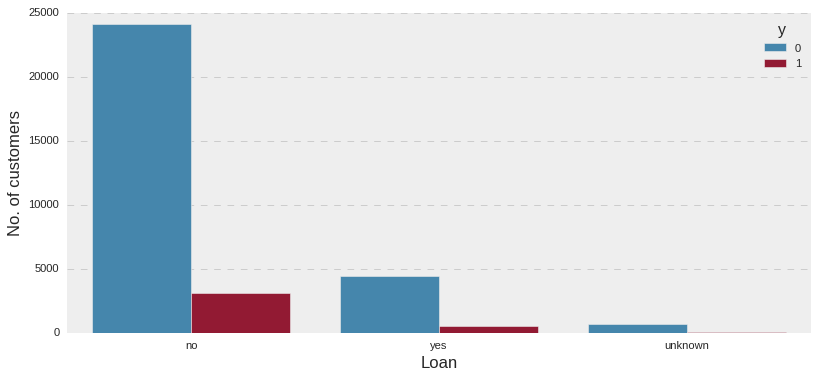

In [321]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='loan', data=df, hue='y')
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [322]:
# Most customers who purchased the Term deposit did not have any loans.

In [323]:
## 4. MODELLING APPROACHES

In [146]:
# We will be using a SVM (Structured Vector Machine) Model for our data prediction.
# First we'll do some more processing of our data so it is ready to be fed in the model.

In [128]:
df_with_dummies = pd.get_dummies(file_data, drop_first=True).astype(np.float32)

In [129]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32978 entries, 0 to 41187
Data columns (total 54 columns):
age                              32978 non-null float32
duration                         32978 non-null float32
campaign                         32978 non-null float32
pdays                            32978 non-null float32
previous                         32978 non-null float32
emp.var.rate                     32978 non-null float32
cons.price.idx                   32978 non-null float32
cons.conf.idx                    32978 non-null float32
euribor3m                        32978 non-null float32
nr.employed                      32978 non-null float32
job_blue-collar                  32978 non-null float32
job_entrepreneur                 32978 non-null float32
job_housemaid                    32978 non-null float32
job_management                   32978 non-null float32
job_retired                      32978 non-null float32
job_self-employed                32978 non-null flo

In [130]:
df_drop = df_with_dummies.drop('default_yes', axis=1, inplace=True)

In [131]:
X = df_with_dummies.iloc[:, :-1].values
y = df_with_dummies.iloc[:, -1].values

In [132]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# We'll split our dataset into training and testing datasets.
# The testing dataset will be used to check the accuracy of our model.
# We'll keep 90% data for training and 10% for testing.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2, stratify=y)

In [154]:
model = SVC(gamma='auto')

In [ ]:
# Now we'll train our SVM using the training dataset.

In [155]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [156]:
y_pred = model.predict(X_test)

In [157]:
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test), '\n')

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      3092
         1.0       0.39      0.71      0.50       206

    accuracy                           0.91      3298
   macro avg       0.68      0.82      0.73      3298
weighted avg       0.94      0.91      0.92      3298

0.9126743480897513 



In [152]:
# Our model has got a pretty decent accuracy of 91%.

In [ ]:
# Now we'll run the model on the given problem statement data on which we have to make predictions.

In [138]:
df2 = pd.read_csv('test.csv', sep=',')

In [139]:
df2.drop('duration', axis=1, inplace=True)

In [140]:
df_with_dummies2 = pd.get_dummies(df2, drop_first=True).astype(np.float32)

In [141]:
X2 = df_with_dummies2.iloc[:, :].values

In [142]:
scaler2 = StandardScaler()
scaler2.fit(X2)
X2 = scaler2.transform(X2)

In [159]:
## 6. RESULTS AND ANALYSIS

In [143]:
y_pred2 = model.predict(X2)

In [144]:
count=0
count_yes=0
count_no=0
for i in range(len(X2)):
    
    if y_pred2[i]==0:
        count_no+=1
    else:
        count_yes+=1
        
    count+=1
    
print("count=",count)
print("count_yes=",count_yes)
print("count_no=",count_no)

count= 8210
count_yes= 423
count_no= 7787


In [173]:
# Uncomment the below block of code if you want to view the predicted result in the notebook itself

# for i in range(len(X2)):
#     if y_pred2[i]==0:
#         print(str(df2.id[i]) + ",no")
#     else:
#         print(str(df2.id[i]) + ",yes")


In [ ]:
# The most ideal customers are the one with the following:
# 1. Have a University Degree
# 2. Work as Admin
# 3. Are married
# 4. Do not have a loan

# To have the highest chance for the customer to take the deposit, the bank should contact the customer over a cellular connection instead of a telephone.

# Our SVM model has a prediction accuracy of around 91%.
# That implies we have successfully improved the accuracy of the correct customers being targeted from around 11% to around 91%.
# That is more than 8 times improvement in accuracy.
# Hence given the correct customer data, our model can easily predict whether a customer will buy the Term Deposit or Not.
